# How to fit Data with a Generic Function: fare un FIT

## Create Some Data

As an example we create some data, but of course you can also read the data from a file as shown in yesterday's lecture. The important point is to have two arrays, one for the x axis and one for the y axis. We are indeed going to do a 1D fit $y=f(x)$.

In [1]:
import numpy as np

In [2]:
x = np.linspace(0,10*np.pi,10)  #creo un array di x (fittiamo su dati monodimensionali). Ho 10 valori equispaziati che partono da 0 a 10pi

In [40]:
y = x**3   #funzione

y=y*np.random.uniform(0.99, 1.01, len(y))  #--> add noise at 1% level. aggiungo un rumore per evidenziare la crescita degli errori e il grafico.
#se confonde le idee metti # davanti alla y e utilizza solo y=x**3.

In [41]:
import matplotlib.pyplot as plt    #importiamo la libreria matplot lib
plt.rcParams['font.size'] = 16     #font del grafico

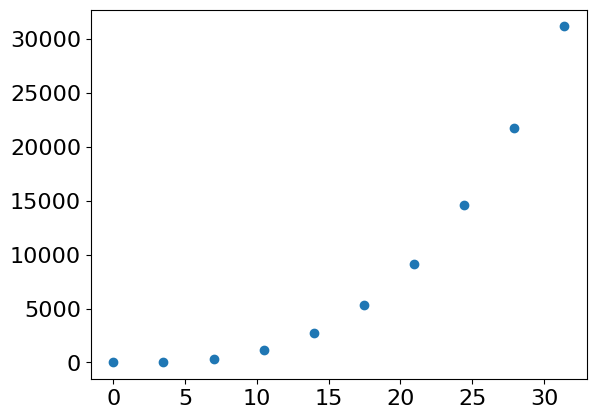

In [42]:
plt.plot(x,y, 'o')     # con la o rappresento i punti
plt.show()

## Use SciPy to Fit the Data

Based on this [lecture](https://education.molssi.org/python-data-analysis/03-data-fitting/index.html)

In [43]:
from scipy.optimize import curve_fit   #importiamo questa libreria e in particolare la funzione curve_fit

The `curve_fit` function has three required inputs: the function you want to fit, the x-data, and the y-data you are fitting. There are **two** outputs. The first is an **array of the optimal values of the parameters**. The second a matrix of the estimated **covariance** of the parameters from which you can calculate the standard error for the parameters.

We first need to define the function we want to use for the fit.

In [44]:
def my_function(x, A, B, C, D):       #definiziamo la funzione che mi fitti la mia curva. la fitto con un polinomio
    y = A + B*x + C*x**2 + D*x**3     #di terzo grado. A,B,C,D sono i parametri del polinomio di fitting
    return y

In [45]:
parameters, covariance = curve_fit(my_function, x, y)   #COMANDO PER FARE IL FIT. curve_fit prende come input
#la funzione my_function definita prima, poi le x e le y.

#sintassi del comando: la funzione curve_fit sappiamo che restituisce due valori:
#il primo è un array, il secondo è una matrice.
#Scritto così significa: il primo output va nella variabile parameters, il secondo va nella variabile covariance.
#QUESTA SINTASSI è PER funzioni che resitutiscono due o piu output! var1, var2 = funzione(...)


In [46]:
print(parameters)   #stampo i parametri
print(covariance)

[-15.0702272   13.10186683  -1.43651225   1.03709311]
[[ 6.45578660e+02 -1.42606661e+02  8.54552727e+00 -1.50322046e-01]
 [-1.42606661e+02  5.48986204e+01 -4.02651822e+00  7.87805278e-02]
 [ 8.54552727e+00 -4.02651822e+00  3.21445568e-01 -6.60913834e-03]
 [-1.50322046e-01  7.87805278e-02 -6.60913834e-03  1.40250273e-04]]


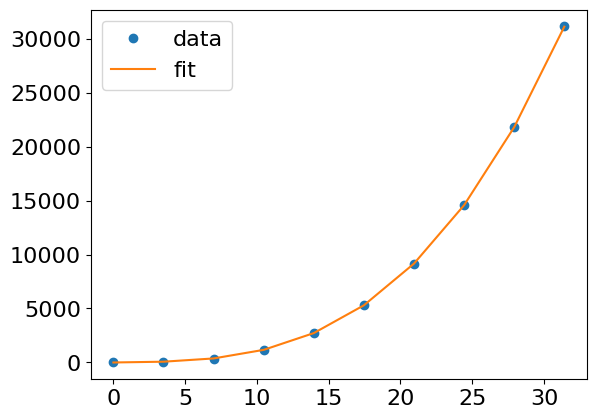

In [47]:
fit_y = my_function(x, parameters[0], parameters[1], parameters[2], parameters[3]) #ora PLOTTO il fit
plt.plot(x, y, 'o', label='data')
plt.plot(x, fit_y, '-', label='fit')   #IL FIT lo plotto con una linea
plt.legend()
plt.show()

The diagonal of `covariance` provide the variance of the parameter estimate. To compute one standard deviation errors on the parameters use `standard_error = np.sqrt(np.diag(covariance))`.
Per avere un idea dell'errore (della dev standard) sui vari coefficienti

In [48]:
#ERRORE SUI SINGOLI PARAMETRI:
SE = np.sqrt(np.diag(covariance))   #prendo la diagonale della matrice di covarianza (è cio che mi serve)
SE_A = SE[0] #standard error on A
SE_B = SE[1] #standard error on B
SE_C = SE[2] #standard error on C
SE_D = SE[3] #standard error on D

print(F'The value of A is {parameters[0]:.5e} with standard error of {SE_A:.5e}.')  #.5e sono le cifre in not scientifica
print(F'The value of B is {parameters[1]:.5e} with standard error of {SE_B:.5e}.')
print(F'The value of C is {parameters[2]:.5e} with standard error of {SE_C:.5e}.')
print(F'The value of D is {parameters[3]:.5e} with standard error of {SE_D:.5e}.')

The value of A is -1.50702e+01 with standard error of 2.54082e+01.
The value of B is 1.31019e+01 with standard error of 7.40936e+00.
The value of C is -1.43651e+00 with standard error of 5.66962e-01.
The value of D is 1.03709e+00 with standard error of 1.18427e-02.


In [49]:
#gli errori su A,B,C sono grandi. L'unico più piccolo è su D

#qualsiasi fit comunque ha un errore.

#-------------------


#Cosa COSTRUIAMO ORA: la funzione con i parametri massimizzati sull'errore e quella minimizzata

#largest values for fit assumin 1  standard dev:
max_fit_y = my_function(x, parameters[0]+SE_A, parameters[1]+SE_B, parameters[2]+SE_C, parameters[3]+SE_D)

#smallest values for fit assuming 1 standard deviation:
min_fit_y = my_function(x, parameters[0]-SE_A, parameters[1]-SE_B, parameters[2]-SE_C, parameters[3]-SE_D)


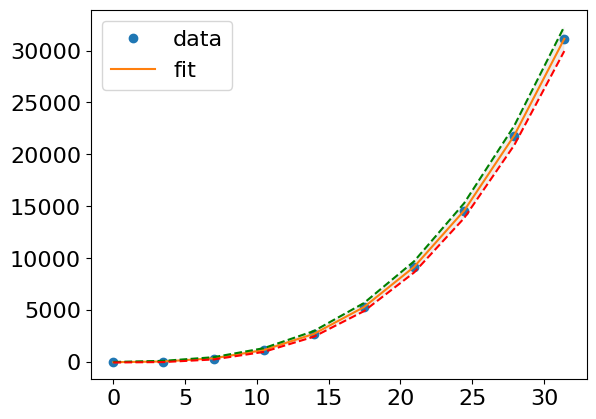

In [53]:
#ERRORE SUL FIT:
plt.plot(x, y, 'o', label='data')
plt.plot(x, fit_y, '-', label='fit')
plt.plot(x, max_fit_y, 'g--')
plt.plot(x, min_fit_y, 'r--')
plt.fill_between(x, max_fit_y, min_fit_y, facecolor="gray", alpha=0.15) #colore tra la "barra di errore"
plt.legend()
plt.show()

#all'interno della regione si trovano tutte le funzioni che possono fittare la funzione, con una certa probabilità.
#compresa la funzione esatta

#dovremmo poter visualizzare il grafico (...)

#E PER INSERIRE anche gli errori sui singoli dati?
